In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
from fx_analysis import reer_vol, imf_import, import_imf_dic

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Importing the data

In [3]:
os.chdir('/Users/talespadilha/Dropbox/Soft Power and FX Prediction/Data')
df0 = pd.read_csv('sub_indices.csv', header = [0,1], index_col = [0], parse_dates=True)
sub_indices = df0.loc[:]
latest = sub_indices.iloc[-1]
sub_latest = latest.unstack('subindex').dropna(how='any')

In [4]:
index = pd.read_csv('index.csv', header = [0], index_col = [0], parse_dates=True)
idx_latest = index.iloc[-1]

In [5]:
sub_latest.to_csv('latest.csv')

In [6]:
index

,ALB,ARG,AUS,AUT,AZE,BEL,BGR,BLR,BRA,CAN,...,SVN,SWE,THA,TTO,TUN,TUR,UKR,URY,USA,VNM
2007-01-01,NaN,0.054728,1.086130,0.959063,-0.246196,0.765347,0.219939,NaN,0.182972,1.021168,...,0.486749,1.129052,-0.002751,0.030148,0.012214,0.345703,NaN,0.049847,1.299753,0.103814
2008-01-01,NaN,-0.007990,1.064970,0.998080,-0.204354,0.806407,0.211349,0.074047,0.241127,1.004001,...,0.515588,1.109230,0.139458,0.052917,0.041428,0.327603,0.068570,0.043441,1.328578,0.223370
2009-01-01,NaN,-0.032343,1.007858,0.929245,-0.220305,0.855623,0.182603,0.081078,0.249771,1.009833,...,0.481332,1.062109,0.100733,0.033485,0.062407,0.351339,0.025245,0.056900,1.279516,0.408807
2010-01-01,NaN,0.046169,0.963023,0.919154,-0.143721,0.791676,0.138466,0.082048,0.290969,0.958167,...,0.438654,1.021659,0.071440,0.069950,0.115961,0.303058,0.047179,0.080676,1.244003,0.601528
2011-01-01,-0.152286,0.122313,0.912421,0.901520,-0.109444,0.847816,0.135056,-0.019724,0.288229,0.985165,...,0.447890,1.019970,0.077050,0.065458,0.026213,0.305977,0.074827,0.162043,1.250753,0.492311
2012-01-01,-0.076611,0.042620,0.932261,0.933242,-0.098636,0.854239,0.210139,0.013811,0.346673,0.983147,...,0.491068,1.029029,0.143705,0.045077,0.002454,0.346800,0.084776,0.059222,1.281534,0.231315
2013-01-01,-0.000538,0.035321,0.975189,0.922439,-0.054800,0.835723,0.178736,0.030132,0.294774,0.947380,...,0.429331,1.004972,0.162438,-0.022471,-0.024570,0.346010,0.156325,0.078296,1.183998,0.164100
2014-01-01,-0.088305,0.025278,0.888822,0.850719,-0.073617,0.784723,0.139134,0.010936,0.292191,0.900013,...,0.414707,0.944750,0.155571,-0.016666,0.035858,0.378306,0.116598,0.117394,1.238365,0.207486
2015-01-01,-0.049828,0.111759,0.901922,0.852343,-0.137078,0.777794,0.155159,0.068035,0.127613,0.966599,...,0.413905,0.968424,0.124052,0.020209,-0.073332,0.309881,0.085119,0.108494,1.280996,0.185731
2016-01-01,-0.020476,0.103021,0.885053,0.796241,-0.143053,0.757843,0.147790,0.079511,0.176019,0.968336,...,0.432320,0.950234,0.159835,0.017087,-0.021926,0.327489,0.112733,0.063775,1.347569,0.219144


### Clustering Subindices

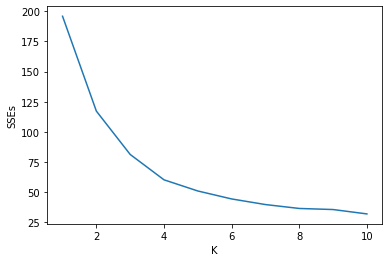

In [7]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sub_latest)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSEs')
plt.plot(k_range, sse)

Estimating the model with optimal K:

In [8]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(sub_latest)
sub_latest['cluster'] = clusters
sub_latest.head()

subindex,comercial,culture,digital,education,global_reach,institutions,cluster
country,,,,,,,
ALB,-0.034137,0.028434,-0.110118,-0.476981,0.034524,-0.169885,0
ARG,-0.037861,0.443124,0.357636,-0.636241,0.149271,-0.210996,0
AUS,0.497662,0.956996,0.383079,1.649425,0.254249,1.327937,1
AUT,0.676156,0.493576,0.530782,1.118692,0.140016,1.302065,1
AZE,0.153189,-0.028908,0.237998,-0.850041,0.087886,-0.538598,0


In [9]:
sub_latest.to_csv('groups.csv')

In [10]:
for i in range(0,4):
    ccs = sub_latest[sub_latest['cluster']==i].index
    print(f"Countries in {i}")
    print(ccs)

Countries in 0
Index(['ALB', 'ARG', 'AZE', 'BGR', 'BLR', 'BRA', 'CHL', 'COL', 'CRI', 'DOM',
       'DZA', 'IDN', 'JOR', 'KAZ', 'LBN', 'MAR', 'MDA', 'MEX', 'MLT', 'MYS',
       'PAN', 'PER', 'PHL', 'QAT', 'ROU', 'SAU', 'SRB', 'THA', 'TTO', 'TUN',
       'TUR', 'UKR', 'URY', 'VNM'],
      dtype='object', name='country')
Countries in 1
Index(['AUS', 'AUT', 'BEL', 'CAN', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'GRC',
       'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'LTU', 'LUX', 'LVA', 'NLD', 'NOR',
       'NZL', 'POL', 'PRT', 'SGP', 'SVK', 'SVN', 'SWE'],
      dtype='object', name='country')
Countries in 2
Index(['CHE', 'CHN', 'DEU', 'ESP', 'FRA', 'GBR', 'ITA', 'RUS', 'USA'], dtype='object', name='country')
Countries in 3
Index(['JPN', 'KOR'], dtype='object', name='country')


In [8]:
for i in range(0,4):
    ccs = sub_latest[sub_latest['cluster']==i].index
    print(f"Countries in {i}")
    print(ccs)

Countries in 0
Index(['ALB', 'ARG', 'AZE', 'BGR', 'BLR', 'BRA', 'CHL', 'COL', 'CRI', 'DOM',
       'DZA', 'IDN', 'JOR', 'KAZ', 'LBN', 'MAR', 'MDA', 'MEX', 'MYS', 'PAN',
       'PER', 'PHL', 'QAT', 'ROU', 'SAU', 'SRB', 'THA', 'TTO', 'TUN', 'TUR',
       'UKR', 'URY', 'VNM'],
      dtype='object', name='country')
Countries in 1
Index(['CHE', 'CHN', 'DEU', 'ESP', 'FRA', 'GBR', 'ITA', 'RUS', 'USA'], dtype='object', name='country')
Countries in 2
Index(['AUS', 'AUT', 'BEL', 'CAN', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'GRC',
       'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD',
       'NOR', 'NZL', 'POL', 'PRT', 'SGP', 'SVK', 'SVN', 'SWE'],
      dtype='object', name='country')
Countries in 3
Index(['JPN', 'KOR'], dtype='object', name='country')


In [11]:
# Adding index
sub_latest['index'] = idx_latest

In [23]:
sub_latest.columns = ['Commercial Prowess', 'Culture', 'Digital Footprint', 'Education', 'Global Reach', 'Institutions', 'cluster', 'Soft Power Index']

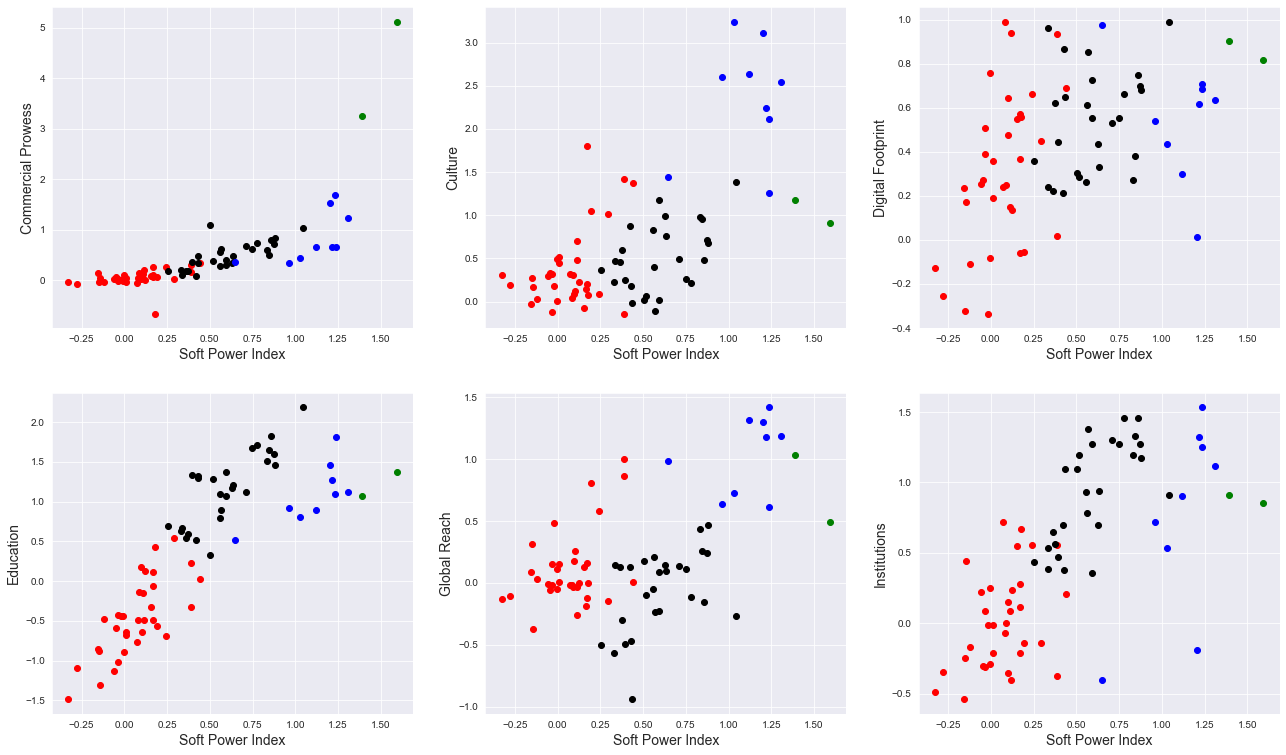

In [33]:
# Prep Plot
df0 = sub_latest[sub_latest['cluster']==0]
df1 = sub_latest[sub_latest['cluster']==1]
df2 = sub_latest[sub_latest['cluster']==2]
df3 = sub_latest[sub_latest['cluster']==3]
columns = ['Commercial Prowess', 'Culture', 'Digital Footprint', 'Education', 'Global Reach', 'Institutions']
# Plot
fig, ax = plt.subplots(2, 3, figsize = (22, 13))
ids = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
for id_key, col in enumerate(columns, 0):
    idx = ids[id_key]
    ax[idx].plot(df0['Soft Power Index'], df0[col], 'o', color='red')
    ax[idx].plot(df1['Soft Power Index'], df1[col], 'o', color='black')
    ax[idx].plot(df2['Soft Power Index'], df2[col], 'o', color='blue')
    ax[idx].plot(df3['Soft Power Index'], df3[col], 'o', color='green')
    ax[idx].set_xlabel('Soft Power Index', fontsize=14)
    ax[idx].set_ylabel(col, fontsize=14)

In [11]:
pd.Series(index.columns.unique()).to_csv('final_list.csv')

### Checking REER

In [34]:
cc_dict = import_imf_dic()
reer0 = imf_import('Raw Data/', 'reer_imf.xlsx')
reer = reer0.rename(columns=cc_dict)
fx_vol = reer_vol(reer)

/Users/talespadilha/Documents/Projects/soft_power/fx_analysis.py:33: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data0 = pd.read_excel(data_path+file_name, header = [0,1], index_col = [0,1])


In [35]:
regimes = pd.read_csv('fx_regime.csv', index_col = [1])[['Regime']]
ff = list(regimes.loc[regimes.Regime=='ff'].index)
cl = list(regimes.loc[regimes.Regime=='cl'].index)
all_ccs = ff

In [36]:
plt_dict = {}
plt_dict['fx_vol'] = fx_vol.reindex(all_ccs, axis=1)
plt_dict['index'] = index.reindex(all_ccs, axis=1)
plt_data = pd.concat(plt_dict, axis=1).stack(level=1).dropna()

In [37]:
plt_data['cluster'] = np.nan
for i in plt_data.index:
    plt_data.loc[i, 'cluster'] = sub_latest.loc[i[1]]['cluster']

In [38]:
plt_data

fx_vol     index  cluster
2007-01-01 AUS  1.920789  1.086130      1.0
           AUT  0.224920  0.959063      1.0
           BEL  0.411945  0.765347      1.0
           BRA  1.951676  0.182972      0.0
           CAN  1.857063  1.021168      1.0
...                  ...       ...      ...
2019-01-01 SWE  0.925566  0.874180      1.0
           UKR  1.808938  0.123656      0.0
           GBR  1.408841  1.217537      2.0
           USA  0.590550  1.235200      2.0
           URY  1.087284  0.153506      0.0

[476 rows x 3 columns]

In [ ]:
# Prep Plot
df0 = plt_data[plt_data['cluster']==0]
df1 = plt_data[plt_data['cluster']==1]
df2 = plt_data[plt_data['cluster']==2]

Text(0, 0.5, 'REER Volatility')

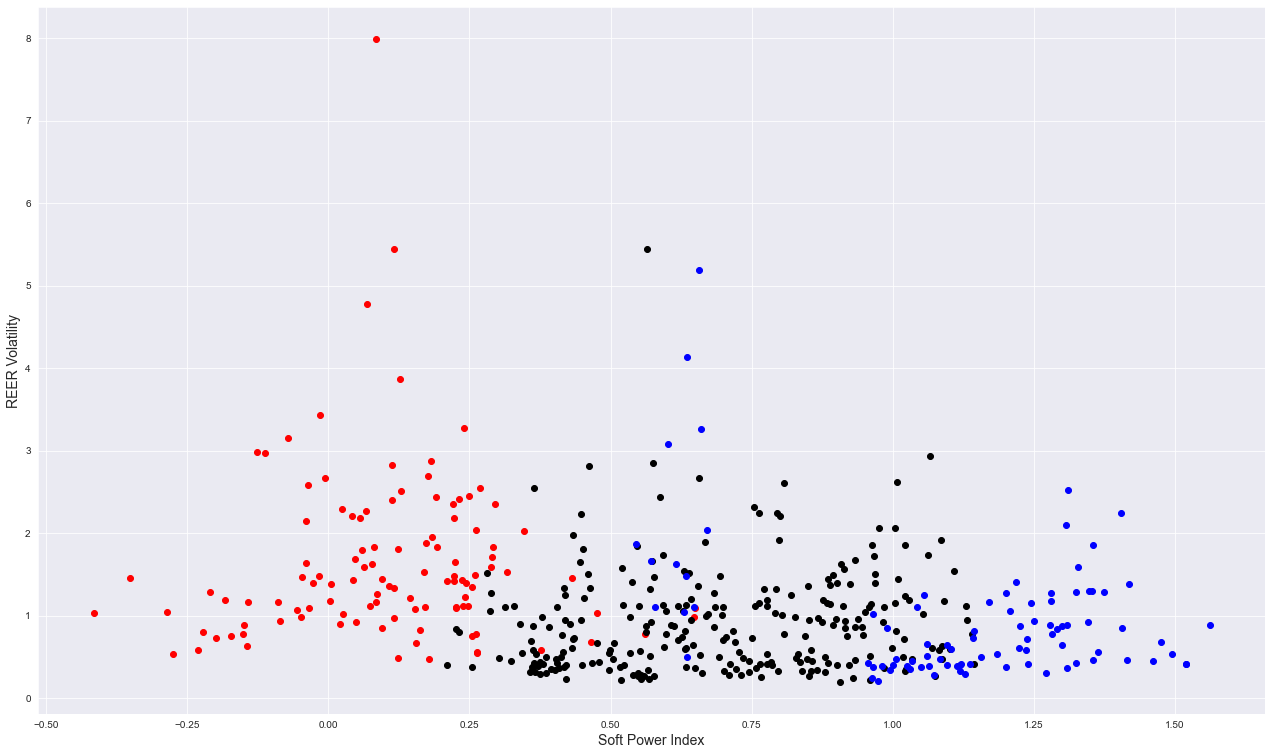

In [52]:
#df3 = plt_data[plt_data['cluster']==3]
plt.figure(figsize=(22, 13))
plt.scatter(df0['Soft Power Index'], df0['REER Volatility'], color='red')
plt.scatter(df1['Soft Power Index'], df1['REER Volatility'], color='black')
plt.scatter(df2['Soft Power Index'], df2['REER Volatility'], color='blue')
#plt.scatter(df3['index'], df3.fx_vol, color='green')
plt.xlabel('Soft Power Index', fontsize=14)
plt.ylabel('REER Volatility', fontsize=14)

In [54]:
plt_data.groupby('cluster').median()

,fx_vol,index
cluster,,
0.0,1.422410,0.116717
1.0,0.803620,0.689120
2.0,0.722147,1.157000
3.0,1.630438,1.475003


In [47]:
df0.columns = ['REER Volatility', 'Soft Power Index', 'cluster']
df1.columns = ['REER Volatility', 'Soft Power Index', 'cluster']
df2.columns = ['REER Volatility', 'Soft Power Index', 'cluster']